<a href="https://colab.research.google.com/github/Priyankamishra2098/OIBSIP/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Oasis Infobyte**

## **Priyanka Mishra**

Batch : October 2023

**Project Name - Sales Prediction**

# **Objective**

The primary objective of sales prediction using an advertising dataset is to develop a model that accurately forecasts sales based on various advertising metrics.

## **1.Importing Libraries and Dataset**

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported sucessfully")


Libraries imported sucessfully


### Loading Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
adv = "/content/drive/MyDrive/Advertising.csv"
print("Dataset loaded sucessfully")

Dataset loaded sucessfully


### Reading of Dataset

In [6]:
df = pd.read_csv(adv)
print("Dataset Read Sucessfully")

Dataset Read Sucessfully


###Dimensions of Dataset

In [7]:
print(df.shape)

(200, 5)


### Dataset First View

In [8]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


## **2.Understanding the Variables**

###Dataset Information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
df.describe().columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### Number of Duplicate Values in the Dataset

In [15]:
# Duplicate Values/Duplicate Values Count

df.duplicated().sum()

0

### Null Values in the Dataset

In [16]:
# Missing Values/Null Values Count
pd.set_option('display.max_columns', None)
pd.DataFrame(df.isna().sum()).T


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,0,0,0,0,0


## **3.Pre-processing and Cleaning of Data**

###Renaming Columns for Clarity

In [ ]:
#  renaming the column 'Unnamed: 0' to 'Index'
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

###Extracting New Data

In [18]:
df.head()

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


###Shape of Processed Data

In [19]:
df.shape

(200, 5)

##5.**Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

###CHART1 : linearity assumption between each independent variable and the dependent variable

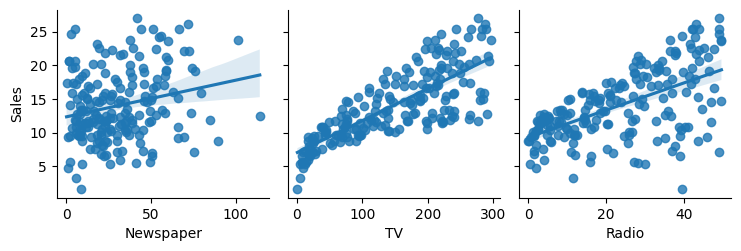

In [20]:
# Scatter plots to check the linearity assumption between each independent variable (TV, Radio, Newspaper) and the dependent variable (Sales)

sns.pairplot(df, x_vars=["Newspaper", "TV", "Radio"], y_vars="Sales",kind='reg')

###CHART2 : normality assumption of the dependent variable

array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

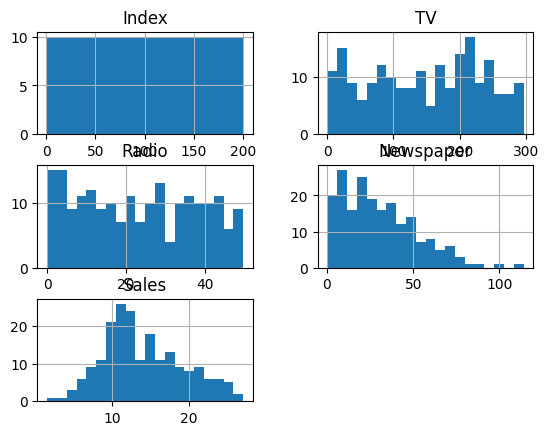

In [24]:
# Histograms to check the normality assumption of the dependent variable (Sales)

# Histograms to check the normality assumption of the dependent variable (Sales)

df.hist(bins=20)


#####  Insight(s) found from the chart?

 "Sales" data  follow a roughly normal distribution.

 It suggests that the normality assumption is met.

###CHART3 : Heatmap of Correlation among the columns

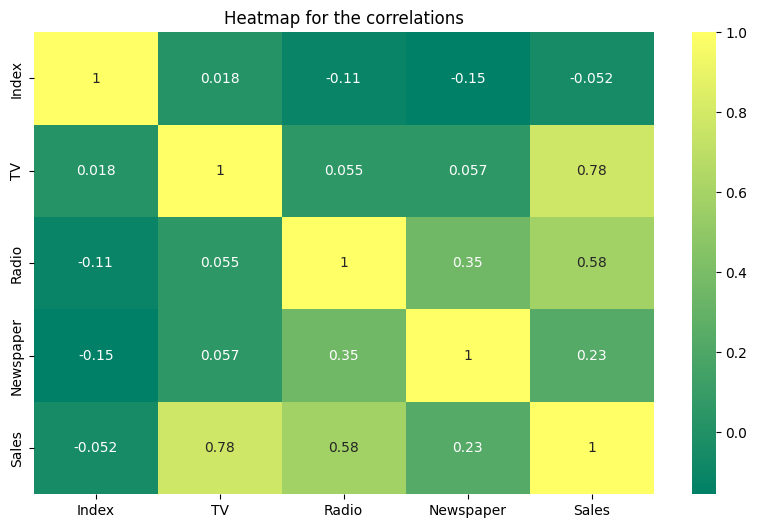

In [25]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="summer")
plt.title("Heatmap for the correlations")
plt.show()

# **Model Selection**

Linear Regression machine learning model for sales prediction


In [34]:
from sklearn.linear_model import LinearRegression

# Creating a Linear Regression model
model = LinearRegression()

# **Data Splitting**

Splitting the dataset into training and testing sets to train


In [38]:
# Splitting the dataset into training and testing sets
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training**

In [39]:
# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the test set

y_pred = model.predict(X_test)



**Model Evaluation**

In [40]:
from sklearn.metrics import mean_squared_error,r2_score

# Evaluating the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 3.17
Root Mean Squared Error: 1.78
R-squared: 0.90


The lower MSE and RMSE values indicate that the model is making relatively accurate predictions.

The high R² value (close to 1) suggests that the model is explaining a significant portion of the variability in the Sales data, indicating a good fit.

**Prediction**

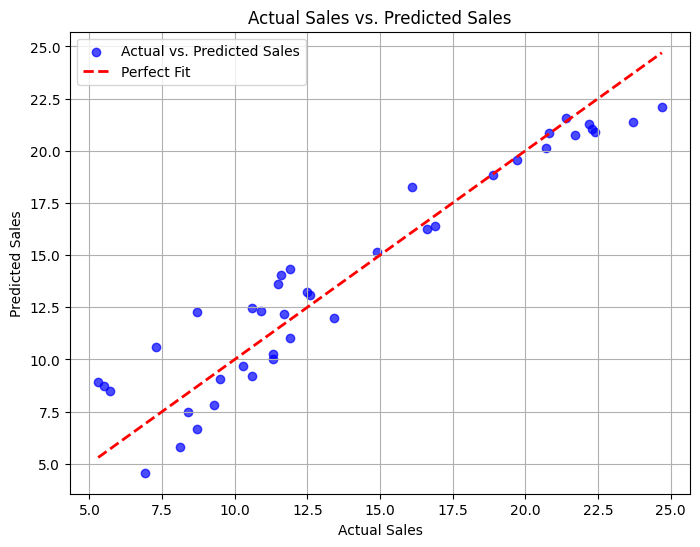

In [41]:
# Visualize the model's predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.7, label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [42]:
# Coefficients and Intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {intercept:.2f}")

Coefficients:
TV: 0.04
Radio: 0.19
Newspaper: 0.00
Intercept: 2.98


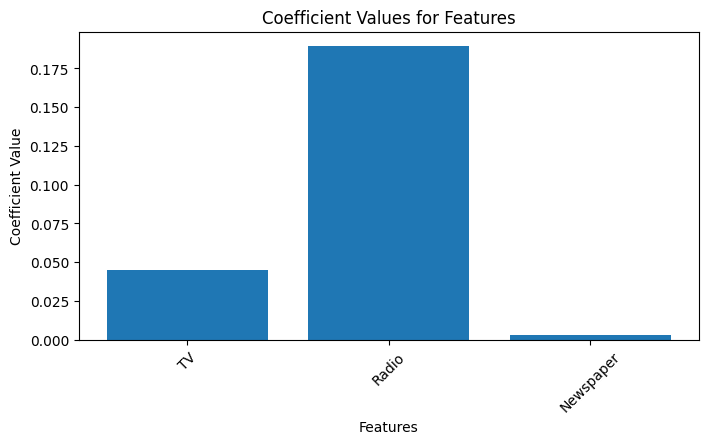

In [45]:
# Coefficient Visualization
plt.figure(figsize=(8, 4))
plt.bar(X.columns, coefficients)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Values for Features")
plt.xticks(rotation=45)
plt.show()

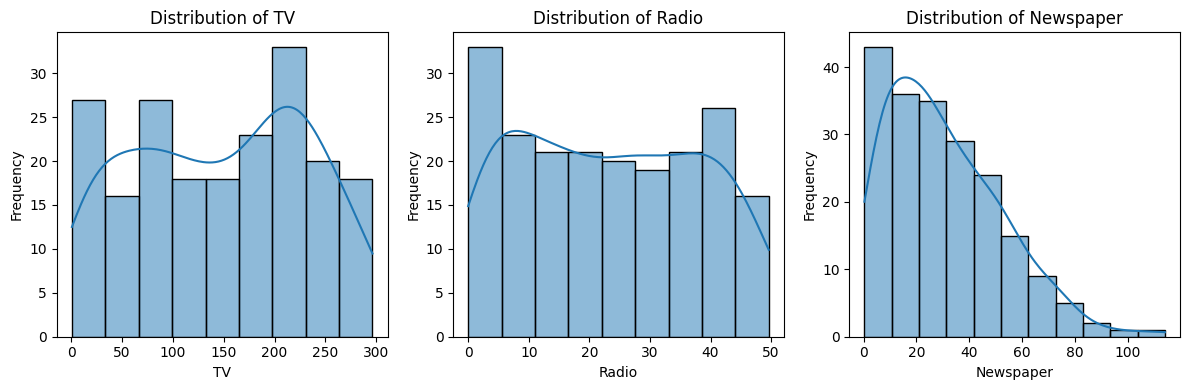

In [44]:
# Feature Distribution Plots
plt.figure(figsize=(12, 4))
for i, feature in enumerate(X.columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [46]:
# Sample new data with the same feature columns as the original dataset
new_df = pd.DataFrame({
    'TV': [200, 150, 300],
    'Radio': [20, 10, 30],
    'Newspaper': [10, 5, 15]
})


In [47]:
new_predictions = model.predict(new_df[['TV', 'Radio', 'Newspaper']])

# Display the predictions for the new data
print("Predictions for New Data:")
print(new_predictions)

Predictions for New Data:
[15.73648306 11.59425107 22.11519092]


# **Conclusion**



The linear regression model, trained on historical advertising data, was used to make predictions for a new set of data. The predicted sales values for the new instances are as follows:

Instance 1: Predicted Sales = 15.74 units
Instance 2: Predicted Sales = 11.59 units
Instance 3: Predicted Sales = 22.12 units
These predictions provide valuable insights into the expected sales outcomes based on the advertising investments in TV, Radio, and Newspaper for the new instances. The model leverages the relationships learned from the training data to generalize and make predictions on previously unseen data.